# Project: Wrangling and Analyze Data

### Data Gathering

The datas were gathered from three souces. The twitter archieve(twitter-archive-enhanced.csv) was manually downloaded. i programmatically dowloadd the image prediction data(image-predictios.tsv) usig the python request library. I used the Twitter API to gather data abbout favorite count and retweet count. The twitter-archive-enhanced.csv contains dataabout tweet from WeRateDogs from 2015-2017.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import time
import datetime
import requests
import io
import os

Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
tweetarchive = pd.read_csv('twitter-archive-enhanced.csv')
tweetarchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#downloading the URL programatically
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(URL)

In [4]:
#I opened the fileand save the content response
with open('image_predictions.tsv',mode = 'wb')as file:
    file.write(response.content)

In [5]:
response

<Response [200]>

In [6]:
#I loaded the file using pandas
imgpred = pd.read_csv('image_predictions.tsv', sep = '\t')
imgpred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [8]:
#I query the twitter API for each tweet in the twitter archive and save JSON in a text file
# I hide the twitter API based on the terms and conditions
consumer_key = 'fOuSGOjaJpziFVUFusGO0wnHp'
consumer_secret = 'OwnD1pOxJmV2PjQYywHBBakoulwZqeaOBSKba3kaxD6ihmrS2B'
access_token = '2784459838-seaYViwuXT8A9pPMjuaOLVPlXinQhlUSTRlhI4c'
access_secret = 'ECpfV79H74wMiIVEJLQopT3j1GfLDkpP2ot9gC4lp0qCh'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
tweetarchive.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [10]:
tweet_ids = tweetarchive.tweet_id.values

In [11]:
len(tweet_ids)

2356

In [12]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        #except tweepy.TweepError as e:
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 348


Fail
1390: 700167517596164096
Success
1391: 700151421916807169
Success
1392: 700143752053182464
Success
1393: 700062718104104960
Success
1394: 700029284593901568
Success
1395: 700002074055016451
Success
1396: 699801817392291840
Success
1397: 699788877217865730
Success
1398: 699779630832685056
Success
1399: 699775878809702401
Success
1400: 699691744225525762
Success
1401: 699446877801091073
Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420:

Rate limit reached. Sleeping for: 350


Fail
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321:

In [13]:
df_list = []

#open text file for reading
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        # Read each JSON string status into a as json_filedictionnary and reading each line as  a dictionary
        each_tweet_line = json.loads(line)
        # fetching the required parameters
        tweet_id = each_tweet_line['id']
        retwt_count = each_tweet_line['retweet_count']
        fav_count = each_tweet_line['favorite_count']
        follows_count = each_tweet_line['user']['followers_count']
        frnds_count = each_tweet_line['user']['friends_count']
            
        df_list.append({'id' : tweet_id,
                        'retweet_count' : retwt_count,
                        'favorite_count' : fav_count,
                        'followers_count' : follows_count,
                        'friends_count' : frnds_count})
            
tweety = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count', 'followers_count', 'friends_count'])

In [14]:
df_list

[{'id': 892420643555336193,
  'retweet_count': 6955,
  'favorite_count': 33655,
  'followers_count': 9372562,
  'friends_count': 21},
 {'id': 892177421306343426,
  'retweet_count': 5263,
  'favorite_count': 29183,
  'followers_count': 9372562,
  'friends_count': 21},
 {'id': 891815181378084864,
  'retweet_count': 3463,
  'favorite_count': 21944,
  'followers_count': 9373039,
  'friends_count': 21},
 {'id': 891689557279858688,
  'retweet_count': 7170,
  'favorite_count': 36691,
  'followers_count': 9372990,
  'friends_count': 21},
 {'id': 891327558926688256,
  'retweet_count': 7706,
  'favorite_count': 35128,
  'followers_count': 9372562,
  'friends_count': 21},
 {'id': 891087950875897856,
  'retweet_count': 2579,
  'favorite_count': 17724,
  'followers_count': 9372562,
  'friends_count': 21},
 {'id': 890971913173991426,
  'retweet_count': 1643,
  'favorite_count': 10303,
  'followers_count': 9373039,
  'friends_count': 21},
 {'id': 890729181411237888,
  'retweet_count': 15660,
  'favor

In [15]:
tweety

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,6955,33655,9372562,21
1,892177421306343426,5263,29183,9372562,21
2,891815181378084864,3463,21944,9373039,21
3,891689557279858688,7170,36691,9372990,21
4,891327558926688256,7706,35128,9372562,21
...,...,...,...,...,...
1850,666049248165822465,36,88,9372593,21
1851,666044226329800704,114,246,9372593,21
1852,666033412701032449,36,100,9372593,21
1853,666029285002620928,39,112,9373040,21


## Assessing Data

In [16]:
tweetarchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
imgpred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
tweety.head()

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,6955,33655,9372562,21
1,892177421306343426,5263,29183,9372562,21
2,891815181378084864,3463,21944,9373039,21
3,891689557279858688,7170,36691,9372990,21
4,891327558926688256,7706,35128,9372562,21


In [19]:
tweetarchive.shape

(2356, 17)

In [20]:
imgpred.shape

(2075, 12)

In [21]:
tweety.shape

(1855, 5)

In [22]:
tweetarchive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [23]:
imgpred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [24]:
tweety.columns

Index(['id', 'retweet_count', 'favorite_count', 'followers_count',
       'friends_count'],
      dtype='object')

In [25]:
tweetarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [26]:
imgpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
tweety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               1855 non-null   int64
 1   retweet_count    1855 non-null   int64
 2   favorite_count   1855 non-null   int64
 3   followers_count  1855 non-null   int64
 4   friends_count    1855 non-null   int64
dtypes: int64(5)
memory usage: 72.6 KB


In [28]:
tweetarchive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [29]:
imgpred.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [30]:
tweety.dtypes

id                 int64
retweet_count      int64
favorite_count     int64
followers_count    int64
friends_count      int64
dtype: object

In [31]:
tweetarchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [32]:
imgpred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [33]:
tweety.describe()

,id,retweet_count,favorite_count,followers_count,friends_count
count,1.855000e+03,1855.000000,1855.000000,1.855000e+03,1855.0
mean,7.178713e+17,1906.220485,5146.763342,9.372691e+06,21.0
std,5.365349e+16,3530.990011,8712.954085,1.964782e+02,0.0
min,6.660209e+17,2.000000,0.000000,9.372562e+06,21.0
25%,6.747664e+17,424.000000,1131.500000,9.372564e+06,21.0
50%,6.978815e+17,897.000000,2560.000000,9.372577e+06,21.0
75%,7.510008e+17,1977.500000,5458.500000,9.372975e+06,21.0
max,8.924206e+17,70165.000000,143980.000000,9.373057e+06,21.0


In [34]:
tweetarchive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [35]:
imgpred.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [36]:
tweety.nunique()

id                 1855
retweet_count      1347
favorite_count     1594
followers_count      71
friends_count         1
dtype: int64

In [37]:
tweetarchive.duplicated().sum()

0

In [38]:
imgpred.duplicated().sum()

0

In [39]:
tweety.duplicated().sum()

0

## ASSESSING

### Quality issues

#### Here are some quality issues i noticed in the data via visual and programmatic assessment.

#### Tweetarchive

1.	Missing values found in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.

2.	The time stamp is in object and needs to be changed in date time

3.	In tweetarchive, doggo, floofer, pupper, poppy should be classified in one table as dog names.

4.	In tweetarchive, under dog names, some names are missing

5.	The tweet ID in tweetarchive should be changed from an integer to a string



#### Imgpred

6. Case sensitive dog names in p1, p2, and p3

7. Tweet ID in impred should be changed to a string

#### Tweety

8. Tweet ID in tweety should also be changed to string

9. In tweety, the id should be changed to tweet ID for easy merger

### Tidiness issues

1. The coulums containing friends_counts has only one value and only 24 values seen in followers_count coulums

2. Tweetarchieve, imgpred, and tweety should be merged as instructed for ease of reading.



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 


In [40]:
# Make copies of original pieces of data
tweetarchive_clean = tweetarchive.copy()
imgpred_clean = imgpred.copy()
tweety_clean = tweety.copy()

### Issue #1:

#### Define:

Data in reply to status ID, user ID, retweeted status ID, retweeted user ID, stamp time, and url should be dropped due to incomplete data

#### Code

In [41]:
tweetarchive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [42]:
print(tweetarchive['retweeted_status_id'].notnull().sum())
tweetarchive = tweetarchive[tweetarchive['retweeted_status_id'].isna()]

181


In [44]:
tweetarchive['retweeted_status_id'].notnull().sum()

0

In [45]:
print(tweetarchive_clean['retweeted_status_id'].notnull().sum())
tweetarchive_clean = tweetarchive_clean[tweetarchive_clean['retweeted_status_id'].isna()]

181


In [46]:
print(tweetarchive_clean['retweeted_status_id'].notnull())
tweetarchive_clean = tweetarchive_clean[tweetarchive_clean['retweeted_status_id'].isna()]

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: retweeted_status_id, Length: 2175, dtype: bool


In [47]:
print(tweetarchive_clean['retweeted_status_id'].notnull().sum())
tweetarchive_clean = tweetarchive_clean[tweetarchive_clean['retweeted_status_id'].isna()]

0


In [48]:
tweetarchive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                   'retweeted_status_timestamp', 'expanded_urls'], axis = 1, inplace = True)

#### Test

In [49]:
tweetarchive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #2:

#### Define:

Time stamp is in object and needs to be changed in date time

#### code:

In [50]:
tweetarchive_clean['timestamp'] = pd.to_datetime(tweetarchive_clean['timestamp'])

#### Test

In [51]:
tweetarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.9+ KB


In [52]:
tweetarchive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue #3:

#### Define:

Doggo, floofer, pupper, puppo should be classified in one table as dog names.

#### code:

In [53]:
 tweetarchive_clean.replace('None', '', inplace=True)

In [54]:
tweetarchive_clean['dogstage'] = tweetarchive_clean.doggo + tweetarchive_clean.floofer + tweetarchive_clean.pupper + tweetarchive_clean.puppo

In [55]:
# tweetarchive_clean.dogstage.replace('doggopupper', 'doggo,pupper', inplace = True)
# tweetarchive_clean.dogstage.replace('doggopuppo', 'doggo,puppo', inplace = True)
# tweetarchive_clean.dogstage.replace('doggofloofer', 'doggo,floofer', inplace = True)
# tweetarchive_clean.dogstage.replace('None', '', inplace = True)

tweetarchive_clean.doggo.replace('None', '', inplace=True) 
tweetarchive_clean.floofer.replace('None', '', inplace=True) 
tweetarchive_clean.pupper.replace('None', '', inplace=True) 
tweetarchive_clean.puppo.replace('None', '', inplace=True)

In [56]:
# tweetarchive_clean['dogstage'] = tweetarchive_clean['dogstage'].replace('', np.nan)

tweetarchive_clean['dog_stage'] = tweetarchive_clean.doggo + tweetarchive_clean.floofer + tweetarchive_clean.pupper + tweetarchive_clean.puppo

In [57]:
tweetarchive_clean.loc[tweetarchive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper' 
tweetarchive_clean.loc[tweetarchive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo' 
tweetarchive_clean.loc[tweetarchive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [58]:
tweetarchive_clean.loc[tweetarchive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [59]:
tweetarchive_clean.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis = 1, inplace = True)

#### Test

In [60]:
tweetarchive_clean.dogstage.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dogstage, dtype: int64

### Issue #4:

#### Define:

Under dog names in tweetarchive dataset, some dogs names were words

#### code:

In [61]:
Nameless =[]
for v in tweetarchive_clean.name:
    if v.islower() and v not in Nameless:
        Nameless.append(v)
print(Nameless)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [62]:
tweetarchive_clean.name.replace(Nameless, 'None', inplace=True)

In [63]:
for v in tweetarchive_clean:
    if v.islower():
        print(v)

tweet_id
timestamp
source
text
rating_numerator
rating_denominator
name
dogstage
dog_stage


#### Test

In [64]:
tweetarchive_clean['name'].sample

<bound method NDFrame.sample of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351            
2352        None
2353        None
2354        None
2355            
Name: name, Length: 2175, dtype: object>

### Issue #5:

#### Define:

The tweet ID in tweetarchive dataset should be changed from an integer to a string

#### code:

In [65]:
tweetarchive_clean['tweet_id'] = tweetarchive_clean['tweet_id'].astype(str)

#### Test

In [66]:
tweetarchive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
dogstage                           object
dog_stage                          object
dtype: object

### Issue #6:

#### Define:

In imgpred dataset, there are case sensitive dog names in p1, p2, and p3

#### code:

In [67]:
imgpred_clean = imgpred_clean[['tweet_id', 'p1', 'p2', 'p3']]
    
for column in imgpred_clean.select_dtypes("object").columns:
    imgpred_clean[column] = imgpred_clean[column].str.lower()

#### Test

In [68]:
imgpred_clean.head()

,tweet_id,p1,p2,p3
0,666020888022790149,welsh_springer_spaniel,collie,shetland_sheepdog
1,666029285002620928,redbone,miniature_pinscher,rhodesian_ridgeback
2,666033412701032449,german_shepherd,malinois,bloodhound
3,666044226329800704,rhodesian_ridgeback,redbone,miniature_pinscher
4,666049248165822465,miniature_pinscher,rottweiler,doberman


### Issue #7:

#### Define:

Tweet ID in imgpred should be changed to a string

#### code:

In [69]:
imgpred_clean['tweet_id'] = imgpred_clean['tweet_id'].astype(str)

In [70]:
imgpred_clean.columns

Index(['tweet_id', 'p1', 'p2', 'p3'], dtype='object')

#### Test

In [71]:
imgpred_clean.columns

Index(['tweet_id', 'p1', 'p2', 'p3'], dtype='object')

### Issue #8:

#### Define:

ID in tweety dataset should also be changed to string.

#### code:

In [72]:
tweety_clean['id'] = tweety_clean['id'].astype(str)

#### Test

In [73]:
tweety_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1855 non-null   object
 1   retweet_count    1855 non-null   int64 
 2   favorite_count   1855 non-null   int64 
 3   followers_count  1855 non-null   int64 
 4   friends_count    1855 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 72.6+ KB


### Issue #9:

#### Define:

In tweety dataset, the id should be changed to tweet ID for easy merger

#### code:

In [74]:
tweety_clean.rename(columns={'id':'tweet_id'},inplace=True)

#### Test

In [75]:
tweety_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'followers_count',
       'friends_count'],
      dtype='object')

### Issue #11:

#### Define:

tweetarchieve, imgpreg, and tweety should be merged as instructed for ease of reading.

#### code:

In [76]:
API = pd.merge(tweetarchive_clean,imgpred_clean,on='tweet_id',how='left').merge(tweety_clean, on='tweet_id', how='left')

#### Test

In [77]:
API.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   dogstage            2175 non-null   object             
 8   dog_stage           344 non-null    object             
 9   p1                  1994 non-null   object             
 10  p2                  1994 non-null   object             
 11  p3                  1994 non-null   object             
 12  retweet_count       1773 non-null 

### Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [78]:
API.to_csv('twitter_archive_master.csv',index=False)

In [79]:
Data = pd.read_csv('twitter_archive_master.csv')
Data.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,dog_stage,p1,p2,p3,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,orange,bagel,banana,6955.0,33655.0,9372562.0,21.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,chihuahua,pekinese,papillon,5263.0,29183.0,9372562.0,21.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,chihuahua,malamute,kelpie,3463.0,21944.0,9373039.0,21.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,paper_towel,labrador_retriever,spatula,7170.0,36691.0,9372990.0,21.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,basset,english_springer,german_short-haired_pointer,7706.0,35128.0,9372562.0,21.0


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [80]:
Data = pd.read_csv('twitter_archive_master.csv')
Data.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,dog_stage,p1,p2,p3,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,orange,bagel,banana,6955.0,33655.0,9372562.0,21.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,chihuahua,pekinese,papillon,5263.0,29183.0,9372562.0,21.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,chihuahua,malamute,kelpie,3463.0,21944.0,9373039.0,21.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,paper_towel,labrador_retriever,spatula,7170.0,36691.0,9372990.0,21.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,basset,english_springer,german_short-haired_pointer,7706.0,35128.0,9372562.0,21.0


In [81]:
Data.tail()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogstage,dog_stage,p1,p2,p3,retweet_count,favorite_count,followers_count,friends_count
2170,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN,NaN,miniature_pinscher,rottweiler,doberman,36.0,88.0,9372593.0,21.0
2171,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,None,NaN,NaN,rhodesian_ridgeback,redbone,miniature_pinscher,114.0,246.0,9372593.0,21.0
2172,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,None,NaN,NaN,german_shepherd,malinois,bloodhound,36.0,100.0,9372593.0,21.0
2173,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,None,NaN,NaN,redbone,miniature_pinscher,rhodesian_ridgeback,39.0,112.0,9373040.0,21.0
2174,666020888022790149,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,8,10,NaN,NaN,NaN,welsh_springer_spaniel,collie,shetland_sheepdog,419.0,2279.0,9372593.0,21.0


In [82]:
Data.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,followers_count,friends_count
count,2.175000e+03,2175.000000,2175.000000,1773.000000,1773.000000,1.773000e+03,1773.0
mean,7.371205e+17,13.215172,10.492874,1755.324309,5384.797518,9.372690e+06,21.0
std,6.748668e+16,47.725696,7.019084,3421.083948,8840.028430,1.954609e+02,0.0
min,6.660209e+17,0.000000,0.000000,2.000000,45.000000,9.372562e+06,21.0
25%,6.768432e+17,10.000000,10.000000,415.000000,1300.000000,9.372564e+06,21.0
50%,7.098528e+17,11.000000,10.000000,858.000000,2695.000000,9.372577e+06,21.0
75%,7.894226e+17,12.000000,10.000000,1776.000000,5711.000000,9.372974e+06,21.0
max,8.924206e+17,1776.000000,170.000000,70165.000000,143980.000000,9.373057e+06,21.0


### Insights:
1. I observed that in the data, we have 2,356 rows and a total of 15 columns comprises of inntegers, objects, and floats.

2. There are 4 float64, 3 integer-int64, and 8 object

In [83]:
Data = pd.read_csv('twitter_archive_master.csv')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   rating_numerator    2175 non-null   int64  
 5   rating_denominator  2175 non-null   int64  
 6   name                1495 non-null   object 
 7   dogstage            344 non-null    object 
 8   dog_stage           344 non-null    object 
 9   p1                  1994 non-null   object 
 10  p2                  1994 non-null   object 
 11  p3                  1994 non-null   object 
 12  retweet_count       1773 non-null   float64
 13  favorite_count      1773 non-null   float64
 14  followers_count     1773 non-null   float64
 15  friends_count       1773 non-null   float64
dtypes: flo

In [84]:
Data.dtypes

tweet_id                int64
timestamp              object
source                 object
text                   object
rating_numerator        int64
rating_denominator      int64
name                   object
dogstage               object
dog_stage              object
p1                     object
p2                     object
p3                     object
retweet_count         float64
favorite_count        float64
followers_count       float64
friends_count         float64
dtype: object

### To visualized the mea value of my numberical values:

array([[<AxesSubplot:title={'center':'tweet_id'}>,
        <AxesSubplot:title={'center':'rating_numerator'}>,
        <AxesSubplot:title={'center':'rating_denominator'}>],
       [<AxesSubplot:title={'center':'retweet_count'}>,
        <AxesSubplot:title={'center':'favorite_count'}>,
        <AxesSubplot:title={'center':'followers_count'}>],
       [<AxesSubplot:title={'center':'friends_count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

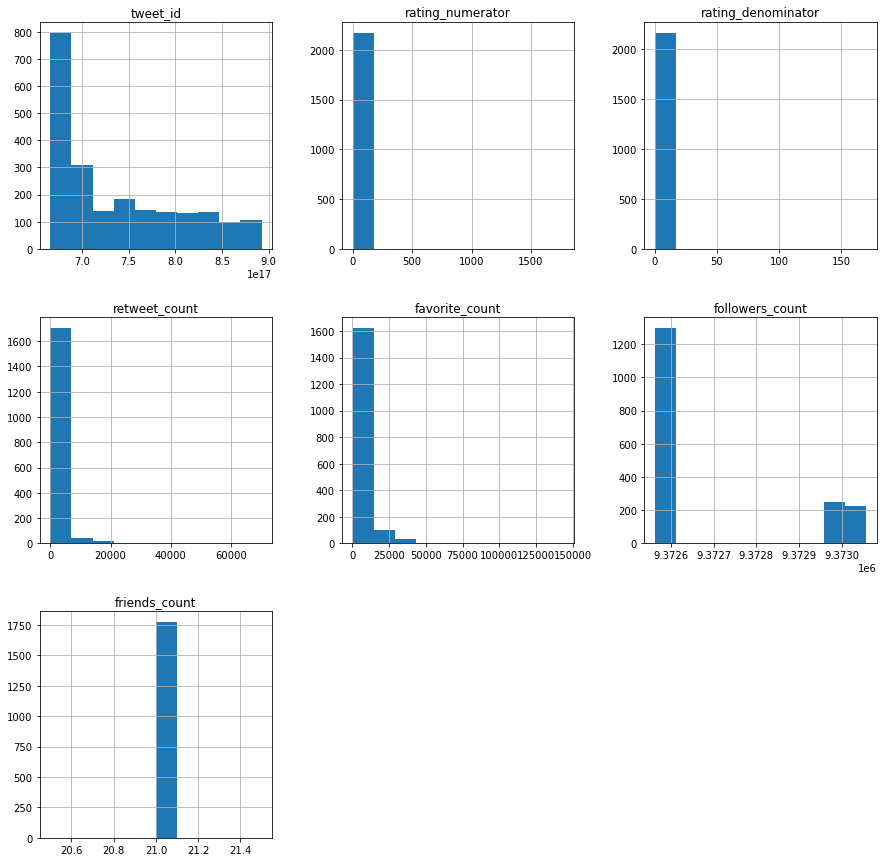

In [85]:
Data.hist(figsize =(15,15), alpha =1)

<AxesSubplot:ylabel='Density'>

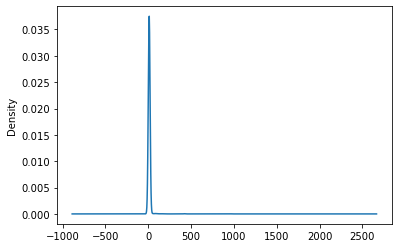

In [86]:
Data.rating_numerator.plot(kind='density')

<AxesSubplot:ylabel='Density'>

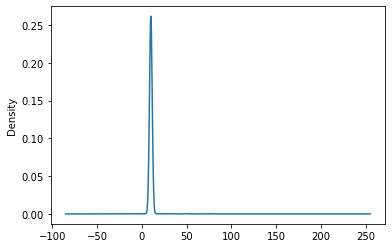

In [87]:
Data.rating_denominator.plot(kind='density')

### Visualization

#### Question 1: Which dogstage recorded the highest favorite_count

#### Answer: From my observation, I observed that the puppo dog recorded the highest favorite_count. 

Text(0, 0.5, 'Favorite count')

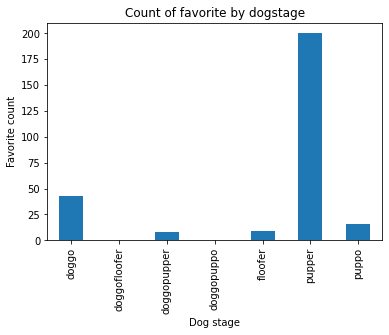

In [88]:
Data.groupby('dogstage')['favorite_count'].count().plot(kind = 'bar')
plt.title('Count of favorite by dogstage')
plt.xlabel('Dog stage')
plt.ylabel('Favorite count')

Scattered plot showig the relationship between the rating denominator and rating nominator. This plot shows a positive correlation between the numerator and the denominator. It also indicate the outliers.

<AxesSubplot:xlabel='rating_numerator', ylabel='rating_denominator'>

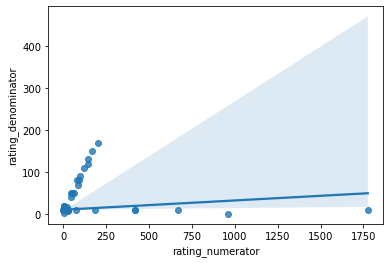

In [89]:
sns.regplot(x=Data['rating_numerator'],y=Data['rating_denominator'])

The above diagram shows a positive linear relationship between the rated numerator and rated denominator. It also shows the outlier,

#### Question3: Which of the source was mostly used

In [90]:
Data.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [91]:
Data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [92]:
def pie_plot(x):
    have = ['iphone', 'vine', 'Twitter web Client', 'TweetDeck']
    Data[x].value_counts().plot.pie(labels=have,autopct='%1.0f%%', figsize=(8,8));

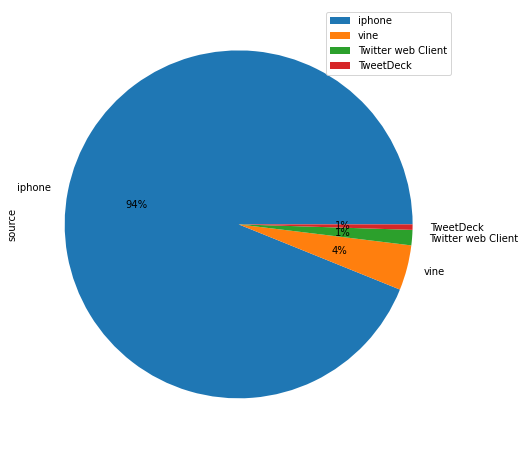

In [93]:
pie_plot('source')
plt.legend();

The above pie char shows that iphone is the highest source with 94%, followed by those using vine.